# COLOR SPACE BASED CBIR SYSTEM
---

---
**Name : Aman Hussain**  
**Reg : 15BCE1077**  
**Description : Color Space Based Image Retrieval System**  
_Note_ : Source Code can be found at my github repo : 
___

### Import Libraries

In [2]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Load Image Dataset

In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [4]:
images = load_images_from_folder('./data')

In [5]:
print("Total Images : {}".format(len(images)))

Total Images : 45


Since images loaded by OpenCV are in BGR colorspace, whereas matplotlib expects images in RGB format we will convert change the color space from BGR to RGB.

In [6]:
%%time
images_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]

CPU times: user 212 ms, sys: 220 ms, total: 432 ms
Wall time: 155 ms


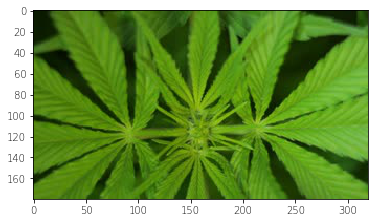

In [12]:
plt.imshow(images_rgb[25])

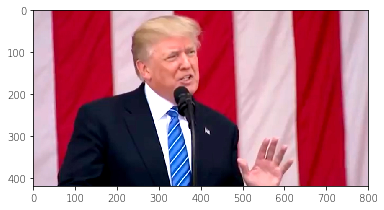

In [8]:
plt.imshow(images_rgb[30])

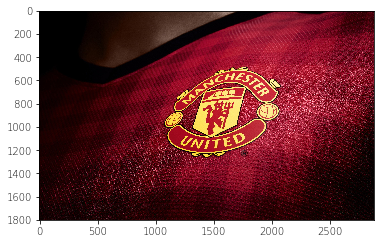

In [9]:
plt.imshow(images_rgb[35])

---
## QUESTION # 1
---

Study how the following CBIR Engines work:
- Akiwi
- Chic Engine
- Image Hunter
- Baidu Image Search
- Yandex Image Search
- Google Image Search

**Akiwi**

Akiwi is a new website that’s designed to help us keyword photographs with minimal effort. It’s a semi-automated image tagging system that is easier than manually tagging and more accurate than automatic image recognition.  

STEPS INVOLVED: 
1. We’ll be asked to drag and drop an image in the search interface.
2. After uploading AKIWI shows collection of similar looking photographs and some keywords based on the image we’ve uploaded.
3. Our job is to select the most relevant images and keywords from the suggestions.
4. The goal of the system is that with just a few clicks of our mouse, we’ll have a relevant and accurate set of keywords.

**Chic Engine**

Chic Engine- A smarter, faster, and easier to use fashion search engine where you search using images rather than keywords. This analyzes images rather than the text of the webpage they appear on.  
Users can utilize the search engine to find pieces of clothing that appeals to them personally by providing an example image of the clothing (or fabric) they are interested in. Other search engines on the web do not yet have a visual search component. Chic Engine is aiming to be the first successful visual search engine online focusing in the fashion area.  
Ex - When you upload a picture of a blue shirt, find all the blue shirts for you. No more guessing the right combinations of keywords to find what you want. 

**Image Hunter**


Image Hunter is a prototype Content Based Image Retrieval system joint developed with the Ambient Intelligence Laboratory (Sardegna Ricerche). The system performs Query by Example searches, that can be interactively refined by Relevance Feedback mechanisms.
In general, this first stage doesn't provide high relevant results because it is an hard task to model the similarity semantic through low level visual features. At this stage the user can submit to the system a feedback, this feedback represents the relevance of the image with respect of the semantic desired. The system implements two degrees of relevance: relevant, not relevant.  
These relevance degrees are subdued to the system that, after a computation, rearrange the research previously made in a way to present to the user more relevant images. In this way it is possible to find similar images in tagged images databases, and, above all, in not-tagged images databases or with meaningless keyword.

**Google Image Search**

Google Image Search-  Google's Search by image is a feature that utilizes reverse image search and allows users to search for related images just by uploading an image or image URL. Google accomplishes this by analyzing the submitted picture. It is then compared with billions of other images in Google's databases before returning matching and similar results. It should be noted that when available, Google also uses metadata about the image such as description.

**Baidu Image Search**

Baidu Image Search-  Baidu introduced "phonetic" or "pin-yin" search, which allows users to type in Chinese keywords using English alphabets. This feature is designed to skip the switching from English input to Chinese input, and for when the user is not sure of the written form of a keyword. Since there are many different ways to pronounce and state common words, and many different dialects, this was a huge addition for the search engine which greatly set it apart from all other search engines. It is load capacity friendly and is designed so it will not overload your site by visiting it too quickly.  

**Yandex**

Yandex images lets you input the image via URL or by uploading directly from the computer. You can also filter search results by file size (Large, Medium, Small). Yandex developed this search engine to track duplicate images. It’s a hassle free reverse image search engine without the need of signing up, totally free and works smoothly.

**Best Image Search Engine**

Google image search is the best as, Google images have the largest database than most of the other sites. Google Images introduced the feature of reverse image search. The mechanism of reverse photo search here is via uploading an image from your computer or pasting the link of the image in the search bar itself, it works equally well both ways, or you can simply drag and drop the image in search bar. Google images use algorithms based on various attributes like shape, size, color and resolution to get the similar pictures.

---
## QUESTION # 2
---

**Convert an image from RGB to HSV and back to RGB**

In [13]:
%%time
images_hsv = [cv2.cvtColor(image, cv2.COLOR_BGR2HSV) for image in images]

CPU times: user 876 ms, sys: 280 ms, total: 1.16 s
Wall time: 336 ms


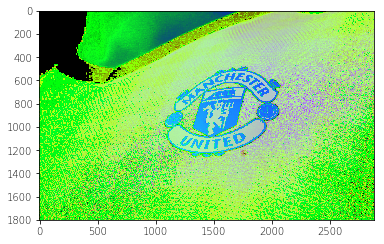

In [14]:
plt.imshow(images_hsv[35])

**Write the equations for conversion**

The R,G,B values are divided by 255 to change the range from 0..255 to 0..1

```
R' = R/255

G' = G/255

B' = B/255

Cmax = max(R', G', B')

Cmin = min(R', G', B')

delta = Cmax - Cmin
```

_Computing HSV values:_

```
HUE
- 0, if delta = 0
- 60 * (G' - B') * mod6 / delta, if Cmax = R'
- 60 * (B' - R') + 2 / delta, if Cmax = G'
- 60 * (R' - G') + 4 / delta, if Cmax = B'

SATURATION
- 0, if Cmax = 0
- delta/cmax, if Cmax = 0

Value
- Cmax
```
 

**Are they perceptually same?**

RGB is an additive color model. It means that different proportions of Red, Blue and Green light can be used to produce color. The RGB color model was created specifically for display purposes (display screens, projectors etc).  
However, HSV space transforms the RGB space into a more convenient representation. The "Whiteness" / "lightness" is a function of R, G and B when we view it in the cube while it's a separate dimension in the HSV space know as Value.  
The Saturation or "colorfulness" is given by the distance of the color from the 3D diagonal of the RGB matrix cube. In the HSV model, the saturation is directly given as another dimension.

**Show the RGB and HSV values of (100,100) pixel**

In [15]:
print("Image dimension : {}".format(images_hsv[0].shape))

Image dimension : (1080, 1920, 3)


For RGB:

In [16]:
print("Red: {}".format(images_rgb[0][100,100,0]))
print("Blue: {}".format(images_rgb[0][100,100,1]))
print("Green: {}".format(images_rgb[0][100,100,2]))

Red: 208
Blue: 170
Green: 161


For HSV:

In [17]:
print("Hue: {}".format(images_hsv[0][100,100,0]))
print("Saturation: {}".format(images_hsv[0][100,100,1]))
print("Value: {}".format(images_hsv[0][100,100,2]))

Hue: 6
Saturation: 58
Value: 208


---
## QUESTION # 3
---

### Source Code

** 1) Image Dimensions Column**

In [49]:
def get_dimension(image):
    return image.shape

** 2) Mean of Color Channels**

In [45]:
def get_mean(img):
    mean_red = img[:,:,0].mean()
    mean_blue = img[:,:,1].mean()
    mean_green = img[:,:,2].mean()
    return (mean_red, mean_blue, mean_green)

** 3) Moment of Color Channels**

In [51]:
def get_moment(img):
    moment_red = cv2.moments(img[:,:,0])['m00']
    moment_blue = cv2.moments(img[:,:,1])['m00']
    moment_green = cv2.moments(img[:,:,2])['m00']
    return (moment_red, moment_blue, moment_green)

**Image Database**

In [59]:
imageDB = pd.DataFrame()

In [60]:
imageDB['image_matrix'] = images_rgb
imageDB['dimension'] = imageDB['image_matrix'].apply(get_dimension)
imageDB['mean'] = imageDB['image_matrix'].apply(get_mean)
imageDB['moment'] = imageDB['image_matrix'].apply(get_moment)

In [61]:
imageDB.head()

,image_matrix,dimension,mean,moment
0,"[[[128, 154, 57], [128, 154, 57], [128, 154, 5...","(1080, 1920, 3)","(129.034656154, 126.569539448, 77.6731843171)","(267566263.0, 262454597.0, 161063115.0)"
1,"[[[40, 73, 127], [43, 76, 130], [45, 78, 132],...","(340, 665, 3)","(52.4383237506, 65.4480185759, 91.4079345422)","(11856305.0, 14797797.0, 20667334.0)"
2,"[[[91, 108, 136], [100, 115, 144], [103, 118, ...","(1115, 1794, 3)","(118.255317426, 128.940006299, 144.475207843)","(236547294.0, 257919984.0, 288995203.0)"
3,"[[[100, 57, 67], [101, 58, 68], [102, 59, 69],...","(2554, 1971, 3)","(133.211793599, 137.469338494, 144.692597281)","(670579377.0, 692011577.0, 728372985.0)"
4,"[[[220, 232, 255], [220, 232, 255], [220, 232,...","(422, 759, 3)","(94.5970471249, 154.516481527, 223.581698918)","(30299245.0, 49491320.0, 71612771.0)"


In [62]:
def euclidean_distance(x=(0,0,0), y=(0,0,0)):
    return np.sqrt(np.square(x[0] - y[0]) 
                   + np.square(x[1] - y[1])
                   + np.square(x[2] - y[2]))

In [167]:
def query(query_img, DB, by='mean', rank=10):
    if by == 'dimension':
        dimension = get_dimension(query_img)
        similarity_dimension = DB['dimension'].map(lambda x : euclidean_distance(dimension, x))
        similarity_dimension = similarity_dimension.to_dict()
        similar_images_dimension = sorted(similarity_dimension, key=similarity_dimension.get)
        # displaying the similar images
        f, axarr = plt.subplots(rank, sharex=True, figsize=(5,30))
        f.suptitle('Similar Images by Dimension')
        for i in range(rank):
            similar_image = similar_images_dimension[i]
            axarr[i].imshow(imageDB.iloc[similar_image][0])
    
    elif by == 'mean':
        # taking measures of the query image
        mean = get_mean(query_img)
        similarity_mean = DB['mean'].map(lambda x : euclidean_distance(mean, x))
        similarity_mean = similarity_mean.to_dict()
        similar_images_mean = sorted(similarity_mean, key=similarity_mean.get)
        # displaying the similar images
        f, axarr = plt.subplots(rank, sharex=True, figsize=(5,30))
        f.suptitle('Similar Images by Mean Color')
        for i in range(rank):
            similar_image = similar_images_mean[i]
            axarr[i].imshow(imageDB.iloc[similar_image][0])

    elif by == 'moment':
        # taking measures of the query image
        moment = get_moment(query_img)
        # finding the similarity measure
        similarity_moment = DB['moment'].map(lambda x : euclidean_distance(moment, x))
        # sorting the similar images
        similarity_moment = similarity_moment.to_dict()
        similar_images_moment = sorted(similarity_moment, key=similarity_moment.get)[:rank]
        # displaying the similar images
        f, axarr = plt.subplots(rank, sharex=True, figsize=(5,30))
        f.suptitle('Similar Images by Color Moment')
        for i in range(rank):
            similar_image = similar_images_moment[i]
            axarr[i].imshow(imageDB.iloc[similar_image][0])            

---
## Demonstration
___

**Image Database**

In [162]:
imageDB

,image_matrix,dimension,mean,moment
0,"[[[128, 154, 57], [128, 154, 57], [128, 154, 5...","(1080, 1920, 3)","(129.034656154, 126.569539448, 77.6731843171)","(267566263.0, 262454597.0, 161063115.0)"
1,"[[[40, 73, 127], [43, 76, 130], [45, 78, 132],...","(340, 665, 3)","(52.4383237506, 65.4480185759, 91.4079345422)","(11856305.0, 14797797.0, 20667334.0)"
2,"[[[91, 108, 136], [100, 115, 144], [103, 118, ...","(1115, 1794, 3)","(118.255317426, 128.940006299, 144.475207843)","(236547294.0, 257919984.0, 288995203.0)"
3,"[[[100, 57, 67], [101, 58, 68], [102, 59, 69],...","(2554, 1971, 3)","(133.211793599, 137.469338494, 144.692597281)","(670579377.0, 692011577.0, 728372985.0)"
4,"[[[220, 232, 255], [220, 232, 255], [220, 232,...","(422, 759, 3)","(94.5970471249, 154.516481527, 223.581698918)","(30299245.0, 49491320.0, 71612771.0)"
5,"[[[68, 67, 72], [68, 67, 72], [68, 67, 72], [6...","(605, 806, 3)","(66.7790681459, 90.5448290712, 118.01668068)","(32563477.0, 44152375.0, 57548474.0)"
6,"[[[111, 137, 134], [127, 149, 146], [99, 115, ...","(688, 670, 3)","(112.389571763, 141.53919646, 157.853703141)","(51807097.0, 65243908.0, 72764243.0)"
7,"[[[80, 87, 93], [37, 50, 58], [46, 68, 82], [4...","(1300, 831, 3)","(86.1608469869, 125.446273257, 172.996840692)","(93079563.0, 135519609.0, 186888487.0)"
8,"[[[59, 70, 100], [49, 75, 100], [47, 77, 101],...","(683, 1024, 3)","(71.7598085194, 78.2336743915, 97.4984286352)","(50188236.0, 54716006.0, 68189621.0)"
9,"[[[22, 34, 76], [22, 34, 76], [22, 34, 76], [2...","(576, 1024, 3)","(58.0260518392, 61.6290452745, 102.107937283)","(34225158.0, 36350290.0, 60225712.0)"


**Ranked By Image Dimension**

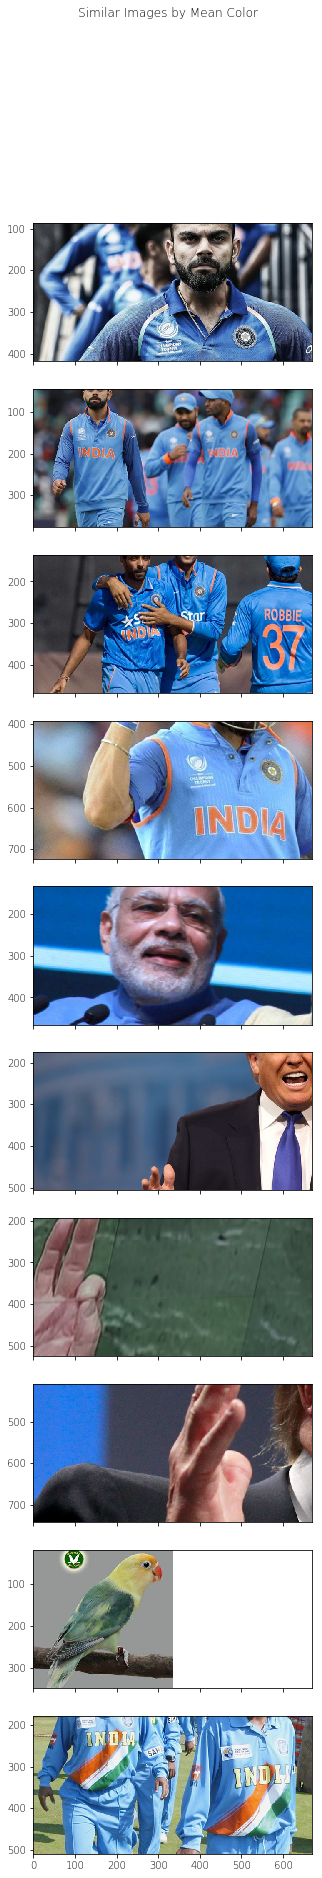

In [163]:
query(images_rgb[13],imageDB, by='mean', rank=10)

**Ranked By Image Color Mean**

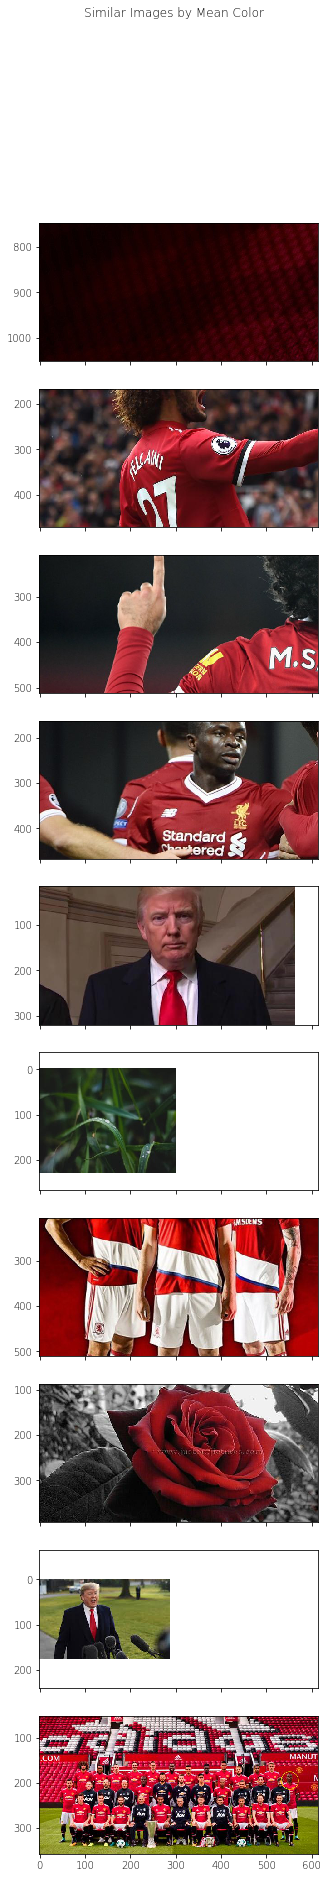

In [164]:
query(images_rgb[35],imageDB, by='mean', rank=10)

**Ranked By Image Moment**

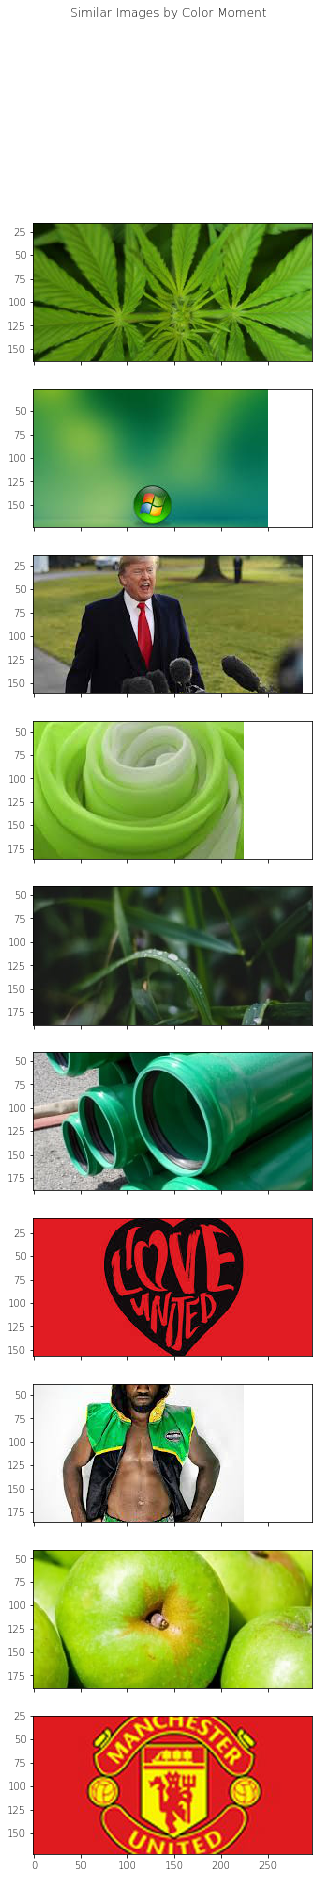

In [166]:
query(images_rgb[25],imageDB, by='moment', rank=10)

---
## Conclusion
___

**Hence, we see that searching images by the mean of color channel returns the most visually similar results.**